### Assumptions in K-Means clustering:

The k means algorithm makes several assumptions about the data that are important to understand. While it often still “works” if you ignore them, you’ll see far better results if you transform the data to work within its assumptions.

* Equal variance: K-means assumes that variables have the same variance. The mean and standard deviation of the values should be similar. If they’re not, you’ll need to scale and standardise the variables.
* Normal distribution: K-means expects the distribution of each variable to be normal, not highly skewed. If it’s skewed, you’ll need to transform it first using a log transform, Box Cox, or similar.
* Similarly sized spherical clusters: It also expects data to form spherical clusters of roughly similar size. If your data aren’t distributed in this way, you may need a different algorithm


In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Let's import the data
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Getting the correlation matrix for the features Age, Annual income and Spending score
df_2 = df.drop(['Gender'],axis= 1)
df_2.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


**Now we can have a look at the distributions of each variable**

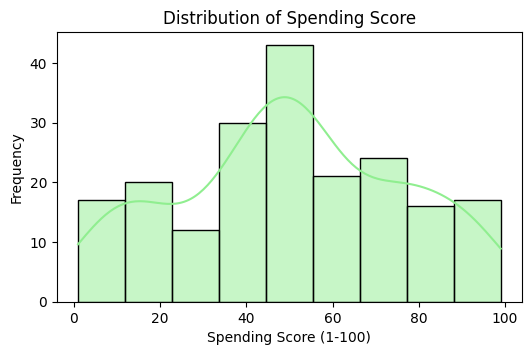

In [10]:
#Checking for each features distribution
#Spending score
plt.figure(figsize= (6,3.5))
sns.histplot(df['Spending Score (1-100)'], kde = True, color='lightgreen')
plt.title('Distribution of Spending Score')
plt.ylabel('Frequency')
plt.show()

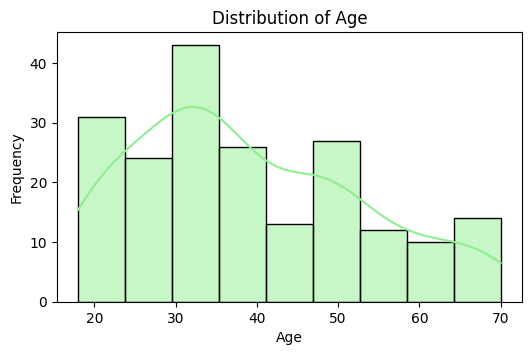

In [12]:
#Age
plt.figure(figsize= (6,3.5))
sns.histplot(df['Age'], kde = True, color='lightgreen')
plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.show()

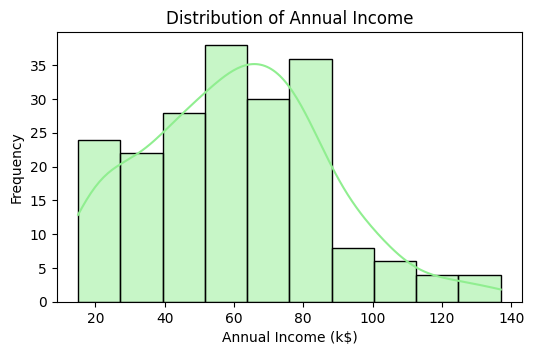

In [13]:
#Spending annual income
plt.figure(figsize= (6,3.5))
sns.histplot(df['Annual Income (k$)'], kde = True, color='lightgreen')
plt.title('Distribution of Annual Income')
plt.ylabel('Frequency')
plt.show()

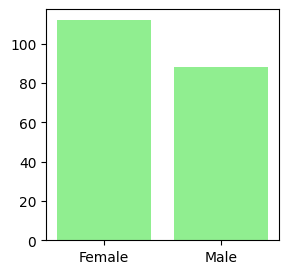

In [14]:
gender_dis = df['Gender'].value_counts().reset_index()
plt.figure(figsize=(3,3))
plt.bar(gender_dis['Gender'], gender_dis['count'],color = 'lightgreen')
plt.show()

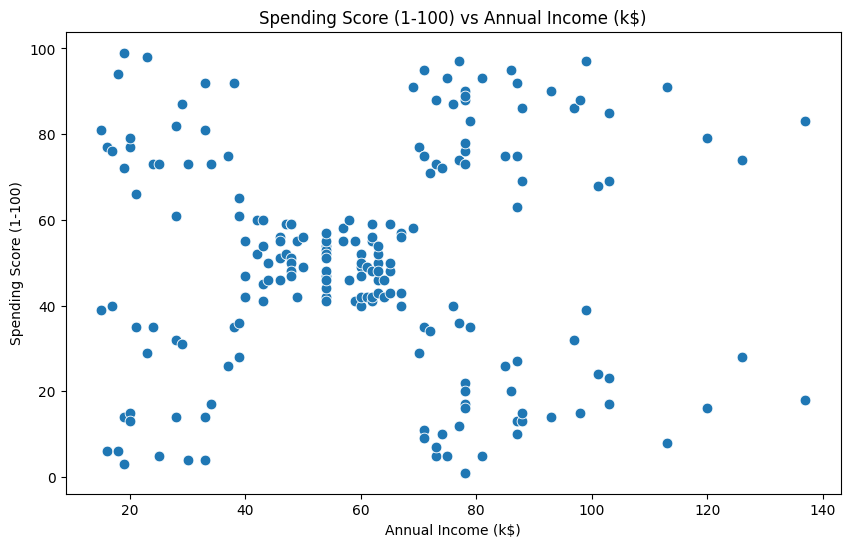

In [15]:
#We will take the annual income and spending score into consideration first
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Now before performing KMeans clustering we need to determine the optimal cluster numbers using WCSS method

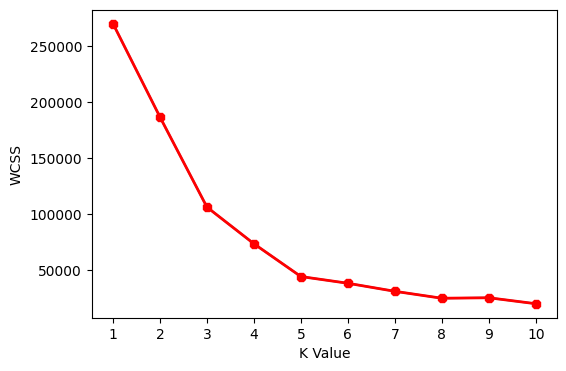

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

#Generating an elbow curve based on the wcss values
plt.figure(figsize=(6,4))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [24]:
#Taking 5 as the optimal clusters
km1 = KMeans(n_clusters=5)
km1.fit(X) #Determines cluster centroids and distances between them until iteration stops when the centroids stop moving
y=km1.predict(X) #To assign each data point to a cluster label
df_3 = df.copy()
#Storing the cluster labels
df_3["label"] = y
df_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


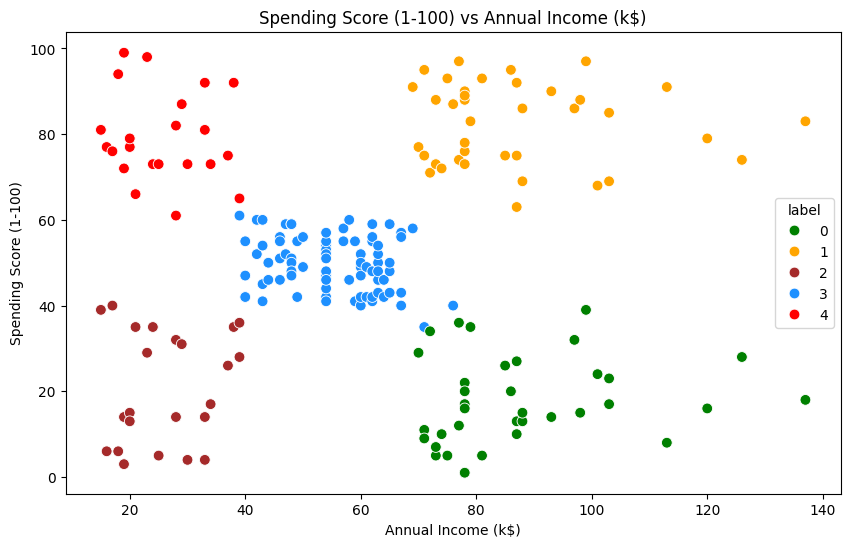

In [25]:
#Visualizing the assigned clusters
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  #Hue will differentiate between each cluster with colors
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df_3  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()